# Problem Statement - Hast Tables

Dictionaries in Python are used to store key-value pairs. Keys are used to store and retrieve values. For example, here's a dictionary for storing and retrieving phone numbers using people's names.

In [1]:
phone_numbers = {
  'Aakash' : '9489484949',
  'Hemanth' : '9595949494',
  'Siddhant' : '9231325312'
}

In [2]:
phone_numbers

{'Aakash': '9489484949', 'Hemanth': '9595949494', 'Siddhant': '9231325312'}

You can access a person's phone number using their name as follows:

In [3]:
phone_numbers['Aakash']

'9489484949'

You can store new phone numbers, or update existing ones as follows:

In [4]:
phone_numbers['Vishal'] = '8787878787'
phone_numbers['Aakash'] = '7878787878'

In [5]:
phone_numbers

{'Aakash': '7878787878',
 'Hemanth': '9595949494',
 'Siddhant': '9231325312',
 'Vishal': '8787878787'}

You can also view all the names and phone numbers stored in phone_numbers using a for loop.

In [6]:
for name in phone_numbers:
    print('Name:', name, ', Phone Number:', phone_numbers[name])

Name: Aakash , Phone Number: 7878787878
Name: Hemanth , Phone Number: 9595949494
Name: Siddhant , Phone Number: 9231325312
Name: Vishal , Phone Number: 8787878787


Dictionaries in Python are implemented using Hash Tables. A hash table uses a list/array to store the key-value pairs, and uses a hashing function to determine the index for storing or retrieving the data associated with a given key. Here's a visual representation:

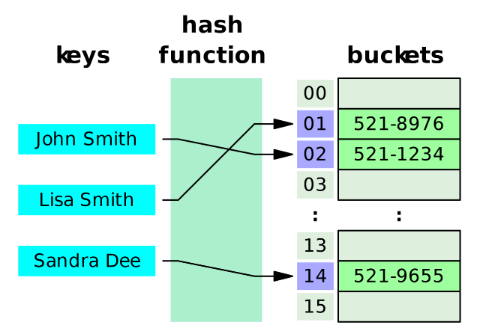

## Assignment - HastTable Class

Your object is to implement a HashTable class which supports the following operations:

Insert: Insert a new key-value pair
Find: Find the value associated with a key
Update: Update the value associated with a key
List: List all the keys stored in the hash table
The HashTable class will have the following structure (note the function signatures):

In [16]:
class HashTable:
    def insert(self, key, value):
        """Insert a new key-value pair"""
        pass
    
    def find(self, key):
        """Find the value associated with a key"""
        pass
    
    def update(self, key, value):
        """Change the value associated with a key"""
        pass
    
    def list_all(self):
        """List all the keys"""
        pass

In [17]:
MAX_HASH_TABLE_SIZE = 4096

In [18]:
data_list = [None] * 4096
len(data_list) == 4096

True

In [19]:
data_list[99] == None

True

### Hashing Function

A *hasing function* is used to convert strings and other non-numeric data types into numbers, which can then be used as list indices. For instance, if a hashing function converts the string `"Askash"` into the number `4`, then the key-value pair `Aakash : 7878787878` will be stored at the position `4` within the data list.

In [5]:
def get_index(data_list, a_string):
    # Variable to store the result (updated after each iteration)
    result = 0
    
    for a_character in a_string:
        # Convert the character to a number
        a_number = ord(a_character)
        # Update result by adding the number
        result += a_number
    
    # Take the remainder of the result with the size of the data list
    list_index = result % len(data_list)
    return list_index

In [6]:
get_index(data_list, '') == 0

True

In [7]:
get_index(data_list, 'Aakash') == 585

True

In [8]:
get_index(data_list, 'Don O Leary') == 941

True

To insert a key-value pair into a hash table, we can simply get the hash of the key, and store the pair at that index in the data list.

In [9]:
key, value = 'Aakash', '787878787878'

In [10]:
idx = get_index(data_list, key)
idx

585

#### List
To get the list of keys.

In [13]:
keys = [kv[1] for kv in data_list if kv is not None]

In [14]:
keys

[]

#### Basic Hash Table Implementation

In [34]:
class BasicHashTable:
    def __init__(self, max_size=MAX_HASH_TABLE_SIZE):
        # 1. Create a list of size `max_size` with all values None
        self.data_list = [None] * max_size
     
    
    def insert(self, key, value):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list, key)
        
        # 2. Store the key-value pair at the right index
        self.data_list[idx] = key, value
    
    
    def find(self, key):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list, key)
        
        # 2. Retrieve the data stored at the index
        kv = self.data_list[idx]
        
        # 3. Return the value if found, else return None
        if kv is None:
            return None
        else:
            key, value = kv
            return value
    
    
    def update(self, key, value):
        # 1. Find the index for the key using get_index
        idx = get_index(self.data_list, key)
        
        # 2. Store the new key-value pair at the right index
        self.data_list[idx] = key, value

    
    def list_all(self):
        # 1. Extract the key from each key-value pair 
        return [kv[0] for kv in self.data_list if kv is not None]

In [35]:
basic_table = BasicHashTable(max_size=1024)
len(basic_table.data_list) == 1024

True

In [36]:
# Insert some values
basic_table.insert('Aakash', '9999999999')
basic_table.insert('Hemanth', '8888888888')

# Find a value
basic_table.find('Hemanth') == '8888888888'

True

In [37]:
# Update a value
basic_table.update('Aakash', '7777777777')

# Check the updated value
basic_table.find('Aakash') == '7777777777'

True

In [38]:
# Get the list of keys
basic_table.list_all() == ['Aakash', 'Hemanth']

True

#### Handling Collisions with Linear Probing

As you might have wondered, multiple keys can have the same hash. For instance, the keys `"listen"` and `"silent"` have the same hash. This is referred to as collision. Data stored against one key may override the data stored against another, if they have the same hash.

In [39]:
basic_table.insert('listen', 99)

In [40]:
basic_table.insert('silent', 200)

In [41]:
basic_table.find('listen')

200

As you can see above, the value for the key `listen` was overwritten by the value for the key `silent`. Our hash table implementation is incomplete because it does not handle collisions correctly.

To handle collisions we'll use a technique called linear probing. Here's how it works:

While inserting a new key-value pair if the target index for a key is occupied by another key, then we try the next index, followed by the next and so on till we the closest empty location.

While finding a key-value pair, we apply the same strategy, but instead of searching for an empty location, we look for a location which contains a key-value pair with the matching key.

While updating a key-value pair, we apply the same strategy, but instead of searching for an empty location, we look for a location which contains a key-value pair with the matching key, and update its value.

We'll define a function called `get_valid_index`, which starts searching the data list from the index determined by the hashing function `get_index` and returns the first index which is either empty or contains a key-value pair matching the given key.

In [43]:
def get_valid_index(data_list, key):
    # Start with the index returned by get_index
    idx = get_index(data_list, key)
    
    while True:
        # Get the key-value pair stored at idx
        kv = data_list[idx]
        
        # If it is None, return the index
        if kv is None:
            return idx
        
        # If the stored key matches the given key, return the index
        k, v = kv
        if k == key:
            return idx
        
        # Move to the next index
        idx += 1
        
        # Go back to the start if you have reached the end of the array
        if idx == len(data_list):
            idx = 0

In [44]:
# Create an empty hash table
data_list = [None] * MAX_HASH_TABLE_SIZE

# New key 'listen' should return expected index
get_valid_index(data_list, 'listen') == 655

True

In [45]:
# Insert a key-value pair for the key 'listen'
data_list[get_index(data_list, 'listen')] = ('listen', 99)

# Colliding key 'silent' should return next index
get_valid_index(data_list, 'silent') == 656

True

In [47]:
class ProbingHashTable:
    def __init__(self, max_size=MAX_HASH_TABLE_SIZE):
        # 1. Create a list of size `max_size` with all values None
        self.data_list = [None] * max_size
     
    
    def insert(self, key, value):
        # 1. Find the index for the key using get_valid_index
        idx = get_valid_index(self.data_list, key)
        
        # 2. Store the key-value pair at the right index
        self.data_list[idx] = key, value
    
    
    def find(self, key):
        # 1. Find the index for the key using get_valid_index
        idx = get_valid_index(self.data_list, key)
        
        # 2. Retrieve the data stored at the index
        kv = self.data_list[idx]
        
        # 3. Return the value if found, else return None
        if kv is None:
            return None
        else:
            key, value = kv
            return value
    
    
    def update(self, key, value):
        # 1. Find the index for the key using get_valid_index
        idx = get_valid_index(self.data_list, key)
        
        # 2. Store the new key-value pair at the right index
        self.data_list[idx] = key, value

    
    def list_all(self):
        # 1. Extract the key from each key-value pair 
        return [kv[0] for kv in self.data_list if kv is not None]

In [48]:
# Create a new hash table
probing_table = ProbingHashTable()

# Insert a value
probing_table.insert('listen', 99)

# Check the value
probing_table.find('listen') == 99

True

In [49]:
# Insert a colliding key
probing_table.insert('silent', 200)

# Check the new and old keys
probing_table.find('listen') == 99 and probing_table.find('silent') == 200

True

In [50]:
# Update a key
probing_table.insert('listen', 101)

# Check the value
probing_table.find('listen') == 101

True

In [51]:
probing_table.list_all() == ['listen', 'silent']

True